<h1>Integrali con Montecarlo</h1>

Consideriamo ad esempio:
$$ I = \int^{xmax}_{xmin} f(x)dx \hspace{1cm} f(x) = e^{-x}(1+acos(x))$$

Soluzione analitica
$$F(x) = -{1\over 2}e^{-x}(-asin(x)+acos(x)+2)$$

Soluzione numerica con Montecarlo con i metodi
<ul>
    <li> Reiezione
    <li> Campionamento semplice
    <li> Campionamento d'importanza
</ul>

Dati: a=0.5, xmax=5, xmin=0

<h2>Disegno della funzione da integrare</h2>

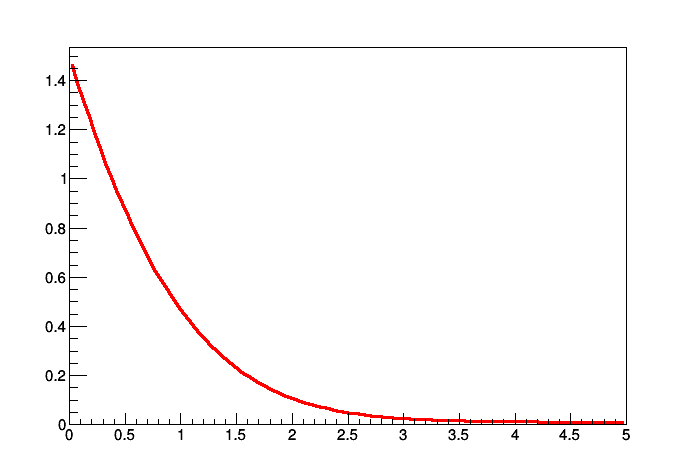

In [1]:
double a    =  0.5;
double xmax =    5;
double xmin =    0;
double funmax = (1+a);

TCanvas c;
c.Draw(); 

TF1 f("f","exp(-x)*(1+[0]*cos(x))",xmin,xmax);
f.SetParameter(0,a);
f.Draw();
f.SetTitle("");
f.SetLineColor(kRed);
f.SetLineWidth(3);

In [2]:
TF1 fInt("fInt","-(1/2.)*exp(-x)*(-[0]*sin(x)+[0]*cos(x)+2)",xmin,xmax);
fInt.SetParameter(0,a);


<h2>Reiezione </h2>

In [3]:
TRandom3 rnd;
rnd.SetSeed(987654321);

double x, y;
double nACC = 0;
double nTOT = 1000000;

In [4]:
TStopwatch treiezione;

for(int i=0;i<nTOT;i++){
    x = rnd.Rndm()*xmax+xmin;
    y = rnd.Rndm()*(1+a);
    if(y < f(x)){
      nACC++;
    }
}

double p    = nACC/nTOT;
double area = (xmax-xmin)*funmax;
double I    = p*area;
double eI   = sqrt(p*(1-p)/nTOT)*area;

cout<<"Reiezione" << endl;
cout<<"I "<<I<<" += "<<eI<<endl;
cout<<"Inom " <<fInt(xmax)-fInt(xmin) <<endl;
cout<<"Cpu_time_used "<<treiezione.CpuTime()<<endl;

Reiezione
I 1.24428 += 0.00278996
Inom 1.24117
Cpu_time_used 0.05


<h2>Campionamento semplice</h2>

In [5]:
TStopwatch tcampsemplice;  
double fm  = 0;
  double fm2 = 0;
  for(int i=0;i<nTOT;i++){
    x = rnd.Rndm()*xmax;
    y = f(x);
    fm  += y;
    fm2 += y*y;
  }

  fm  = fm/nTOT;
  fm2 = fm2/nTOT;
  
  I    = fm*(xmax-xmin);
  eI   = sqrt((fm2-fm*fm)/(nTOT-1))*(xmax-xmin);
  
  cout<<"Campionamento semplice" << endl;
  cout<<"I "<<I<<" += "<<eI<<endl;
  cout<<"Inom " <<fInt(xmax)-fInt(xmin) <<endl;
  cout<<"Cpu_time_used "<<tcampsemplice.CpuTime()<<endl;

Campionamento semplice
I 1.24066 += 0.00185058
Inom 1.24117
Cpu_time_used 0.04


<h2> Campionamento d'importanza </h2>

Funzione di envelope per il campionamento di importanza
$$ g(x) = e^{-x}(1+a)$$


Necessario normalizzare g(x) tra xmin e xmax per il campionamento d'importanza

$$g(x) = {e^{-x}\over (e^{-xmin}-e^{-xmax})}$$

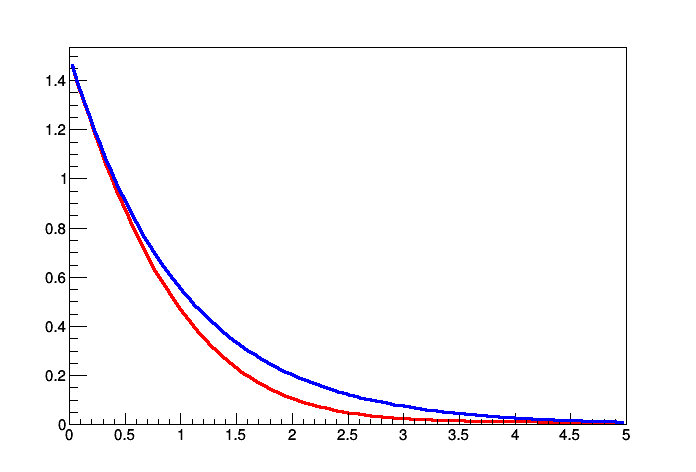

In [6]:

TF1 fEnv("f","exp(-x)*(1+[0])",xmin,xmax);

TCanvas c1;
c1.Draw(); 

fEnv.SetParameter(0,a);
f.Draw();
f.SetTitle("");
fEnv.Draw("SAME");
f.SetLineColor(kRed);
fEnv.SetLineColor(kBlue);
f.SetLineWidth(3);
fEnv.SetLineWidth(3);

In [7]:
TStopwatch tcampimp;   
fm  = 0;
fm2 = 0;
for(int i=0;i<nTOT;i++){
    x    = -TMath::Log(1.0-(rnd.Rndm()*(1-exp(-xmax))));
    y    = f(x)/(exp(-x)/(1-exp(-xmax))); // necessario che g(x) sia una pdf
    fm  += y;
    fm2 += y*y;
}

fm  = fm/nTOT;
fm2 = fm2/nTOT;
  
I    = fm;
eI   = sqrt((fm2-fm*fm)/(nTOT-1));
   
cout<<"Campionamento d'importanza" << endl;
cout<<"I "<<I<<" += "<<eI<<endl;
cout<<"Inom " <<fInt(xmax)-fInt(xmin) <<endl;
cout<<"Cpu_time_used "<<tcampimp.CpuTime()<<endl;


Campionamento d'importanza
I 1.24077 += 0.000294542
Inom 1.24117
Cpu_time_used 0.07
